Pregnancies  Glucose  Bloodpressure  Skinthickness  Insulin  Bodymass  \
0            6      148             72             35        0      33.6   
1            1       85             66             29        0      26.6   

   Diabetes_pedigree_function  age            class  
0                       0.627   50  tested_positive  
1                       0.351   31  tested_negative  
   Pregnancies  Glucose  Bloodpressure  Skinthickness  Insulin  Bodymass  \
0            6      148             72             35        0      33.6   
1            1       85             66             29        0      26.6   

   Diabetes_pedigree_function  age  class  
0                       0.627   50      1  
1                       0.351   31      0  


,Pregnancies,Glucose,Bloodpressure,Skinthickness,Insulin,Bodymass,Diabetes_pedigree_function,age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Bodymass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


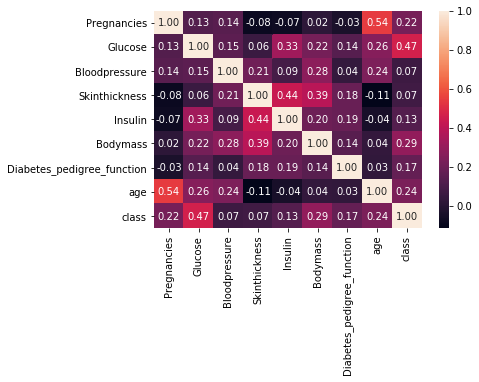

In [1]:
import pandas as pd
import numpy as np
import df_handler as dh
import diabetes_corr as dc
import diabetes_train as dt
from sklearn import metrics
import seaborn as sns

df = dh.read_csv('diabetes.csv') # csv file is loaded
print(df.head(2))

df = dh.negative_positive(df) 
print(df.head(2)) 

dc.plot_corr(df) 
df.corr() # Note fx. that glycose correlates 46,7% with the class(diabetes) 

In [2]:
X_train, X_test, y_train,y_test = dt.train_data(df)
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [3]:
nb_model = dt.naive_bayes(X_train, y_train)
print(nb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [4]:
nb_predict_train_model = dt.models_acuracy(X_train, nb_model)
print("Accuracy: for training model {0:.3f}".format(metrics.accuracy_score(y_train,nb_predict_train_model)))

nb_predict_train_X_test = dt.models_acuracy_X_Test(y_test, nb_model)
print("\nAccuracy: for testing model {0:.3f}".format(metrics.accuracy_score(y_test,nb_predict_train_X_test)))

Accuracy: for training model 0.767

Accuracy: for testing model 0.623


Total number of rows = 768

Number of rows missing - Pregnancies = 111
Number of rows missing - Glucose = 5
Number of rows missing - Bloodpressure  = 35
Number of rows missing - Skinthickness = 227
Number of rows missing - Insulin = 374
Number of rows missing - Body mass  = 11
Number of rows missing - Diabetes_pedigree_function = 0
Number of rows missing - Age  = 0

Total number of rows after cleaning = 336
     Pregnancies  Glucose  Bloodpressure  Skinthickness  Insulin  Bodymass  \
3              1       89             66             23       94      28.1   
6              3       78             50             32       88      31.0   
8              2      197             70             45      543      30.5   
13             1      189             60             23      846      30.1   
14             5      166             72             19      175      25.8   
..           ...      ...            ...            ...      ...       ...   
751            1      121             78   

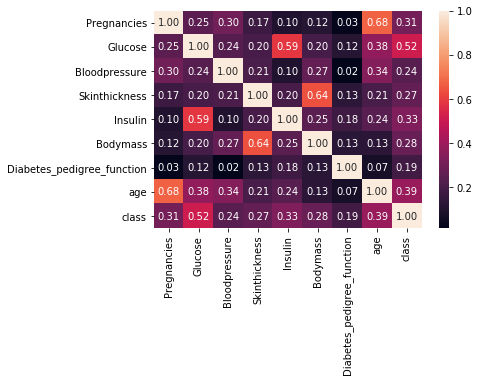

In [5]:
dt.zero_values(df)
new_df = dt.new_dataframe(df)
print(new_df)
#print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
#print("")

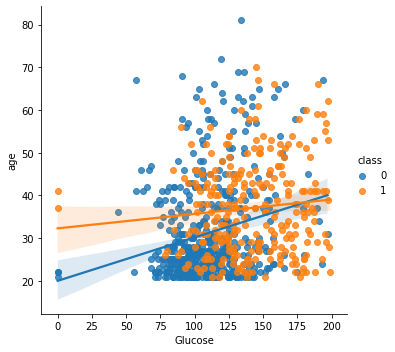

In [6]:
linear_regression = sns.lmplot(x="Glucose", y="age", hue="class", data=df)
print(linear_regression)